In [ ]:
import pandas as pd
import numpy as np 
import pyodbc
import sqlalchemy as sq
from sqlalchemy import create_engine
from sqlalchemy.engine import URL


In [145]:
# #using sqlalchemy


# url_object = URL.create(
#     "mssql+pyodbc",
#     username="HPdbuser",
#     password="admin@db1",
#     host="10.4.38.127",
#     database="ACNLeaveTracker",
#     query={"driver": "ODBC Driver 17 for SQL Server"}
# )

# # Create the SQLAlchemy engine
# conn = sq.create_engine(url_object)

# query = """
#     INSERT INTO stg_upload_status (dealid, username, status)
#     VALUES (?, ?, ?)
#     """
# params = (dealid, username, "started")

# connection.execute(query, params)

# # Execute the query with parameters
# with conn.connect() as connection:
#     connection.execute(query, params)


# # Connect to the database and execute the query
# # with conn.connect() as connection:
# #     # Prepare the SQL query
# #     query = """
# #     INSERT INTO stg_upload_status (dealid, username, status)
# #     VALUES (?, ?, ?)
# #     """
    
# #     # Parameters to pass
# #     params = (dealid, username, "started")

# #     # Execute the query with parameters
# #     connection.execute(query, params)


In [146]:
##using pyodbc -- its better for retreival of data from database and insertion

# """
# conn = pyodbc.connect("Driver={ODBC Driver 17 for SQL Server};"
#                       "Server = 10.4.38.131;"
#                       "Database=MyDatabase;"
#                       "Uid = HPdbuser;"
#                       "Pwd = admin@db1;"
#                       "Trusted_Connection=no")
# cursor = conn.cursor()
# cursor.execute("""INSERT INTO stg_upload_status (dealid, username, status) values(?, ?, ?)""", (dealid, username, "started"))
# conn.commit()

# cursor.close()

# query = "SELECT dealid, username, status FROM stg_upload_status"

# # Execute the SELECT query
# cursor.execute(query)

# # Fetch all results from the query
# rows = cursor.fetchall()

# # Iterate over the results and print them
# for row in rows:
#     print(f"Deal ID: {row.dealid}, Username: {row.username}, Status: {row.status}")

# # Close the cursor and connection
# cursor.close()
# conn.close()

Introduction About the Data :
The dataset The goal is to predict price of given diamond (Regression Analysis).

There are 10 independent variables (including id):

id : unique identifier of each diamond
carat : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
cut : Quality of Diamond Cut
color : Color of Diamond
clarity : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
depth : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
table : A diamond's table is the facet which can be seen when the stone is viewed face up.
x : Diamond X dimension
y : Diamond Y dimension
x : Diamond Z dimension
Target variable:

price: Price of the given Diamond.
Dataset Source Link : https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv

I have solved EDA step by step

1.Reading the data

In [147]:
df = pd.read_csv(r'D:\Datascience\fullstackdsproject\notebooks\data\playground-series-s3e8\train.csv') #openpyxl for .xlsx files
df

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...,...
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


2.Summary statistic

In [148]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,193573.0,96786.000000,55879.856166,0.0,48393.00,96786.00,145179.00,193572.00
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


3.checking if any duplicated data

In [149]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
193568    False
193569    False
193570    False
193571    False
193572    False
Length: 193573, dtype: bool

4.Checking datatype

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


5.Check for missing values

In [151]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

6.If na or null replace with mean, median(for outliers) or mode (categories)

7.Unique values

In [152]:
df.nunique()

id         193573
carat         248
cut             5
color           7
clarity         8
depth         153
table         108
x             522
y             521
z             349
price        8738
dtype: int64

8. Seggrating the categorical and numerical data 

In [153]:
# category_data = df.select_dtypes(include='object')

categorical_columns=df.columns[df.dtypes=="object"] 
category_data

,cut,color,clarity
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
193568,NaN,NaN,NaN
193569,NaN,NaN,NaN
193570,NaN,NaN,NaN
193571,NaN,NaN,NaN


In [154]:
category_data['cut'].value_counts()

Series([], Name: count, dtype: int64)

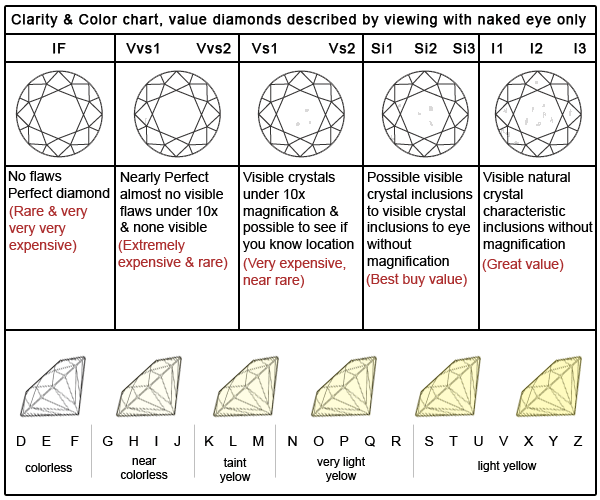

In [155]:
numerical_data = df.select_dtypes(exclude='object')

# numerical_data =data.columns[data.dtypes!="object"]

#drop the id column
numerical_data= numerical_data.drop('id', axis=1)
numerical_data

,carat,depth,table,x,y,z,price
0,1.52,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,61.6,56.0,4.38,4.41,2.71,666
4,1.70,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...
193568,0.31,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,62.9,55.0,4.45,4.49,2.81,681


In [156]:
numerical_data.value_counts()

carat  depth  table  x     y     z     price
0.27   61.5   56.0   4.15  4.18  2.56  577      3
0.31   62.5   57.0   4.34  4.31  2.70  698      3
       62.1   55.0   4.34  4.36  2.70  544      3
0.41   61.4   56.0   4.77  4.80  2.94  1076     3
0.31   61.9   55.0   4.36  4.39  2.71  914      2
                                               ..
0.50   61.4   58.0   5.11  5.14  3.15  1354     1
                           5.15  3.14  1175     1
                                 3.15  1752     1
                     5.12  5.08  3.13  1238     1
3.50   62.8   57.0   9.65  9.59  6.03  18507    1
Name: count, Length: 193212, dtype: int64

9.Visualisation of numerical and categorical data -  Univariate Analysis

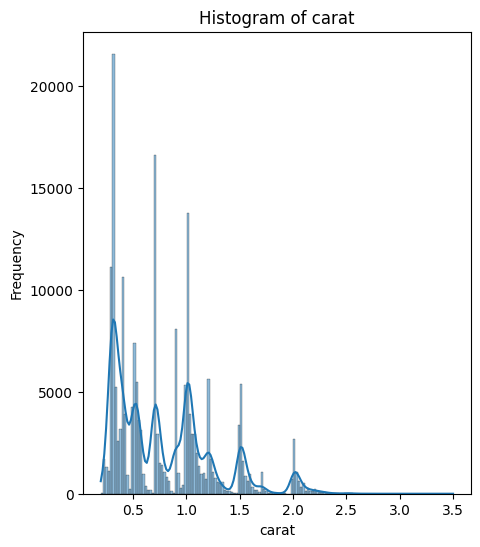

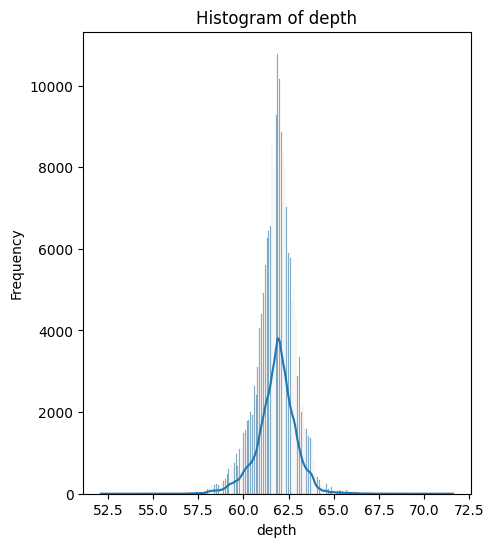

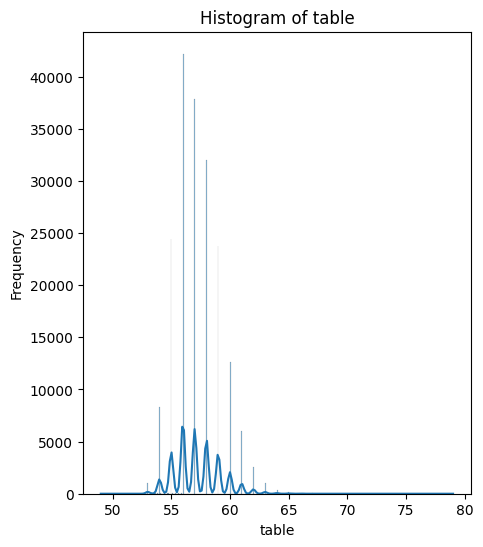

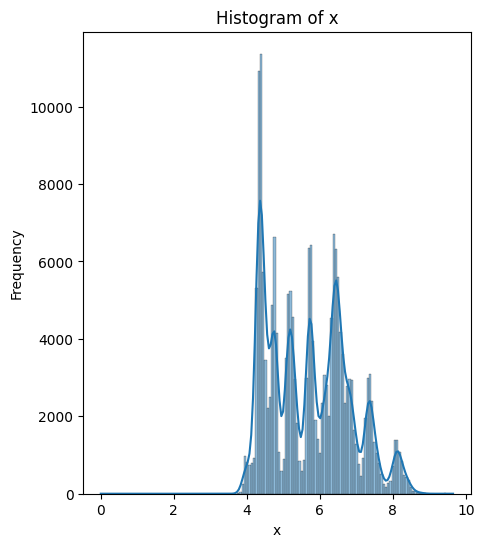

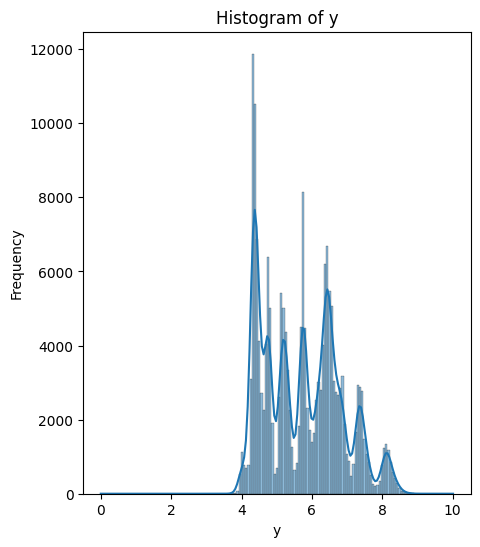

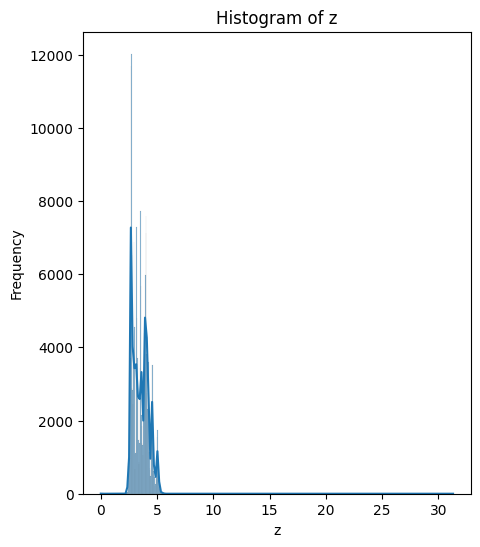

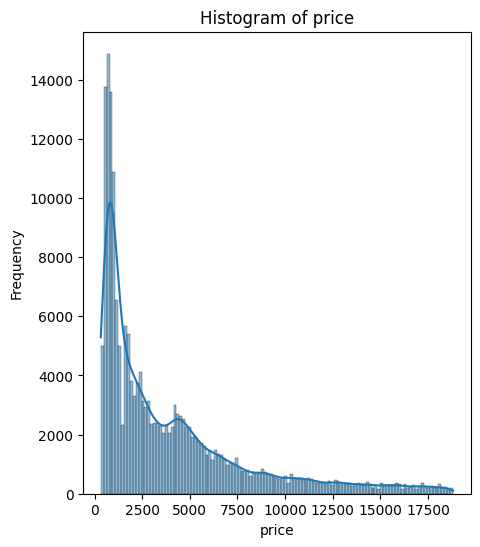

In [157]:
#plot numerical using hist with kde
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

for column in numerical_data.columns:
    plt.figure(figsize=(5, 6))
    sns.histplot(numerical_data[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

C:\Users\shalman\AppData\Local\Temp\ipykernel_6512\3752058455.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=category_data[column], palette='Set2')
C:\Users\shalman\AppData\Local\Temp\ipykernel_6512\3752058455.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.countplot(x=category_data[column], palette='Set2')


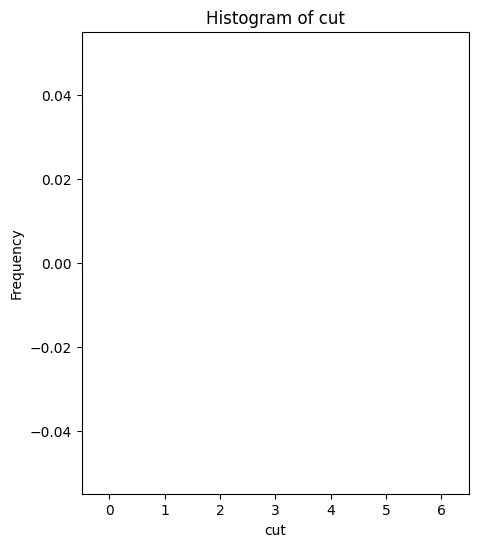

C:\Users\shalman\AppData\Local\Temp\ipykernel_6512\3752058455.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=category_data[column], palette='Set2')
C:\Users\shalman\AppData\Local\Temp\ipykernel_6512\3752058455.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.countplot(x=category_data[column], palette='Set2')


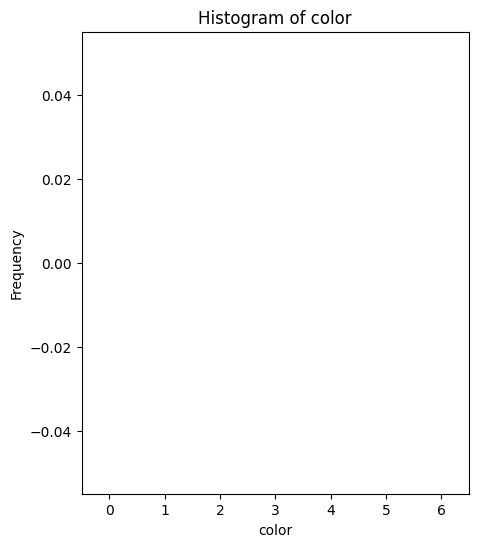

C:\Users\shalman\AppData\Local\Temp\ipykernel_6512\3752058455.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=category_data[column], palette='Set2')
C:\Users\shalman\AppData\Local\Temp\ipykernel_6512\3752058455.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.countplot(x=category_data[column], palette='Set2')


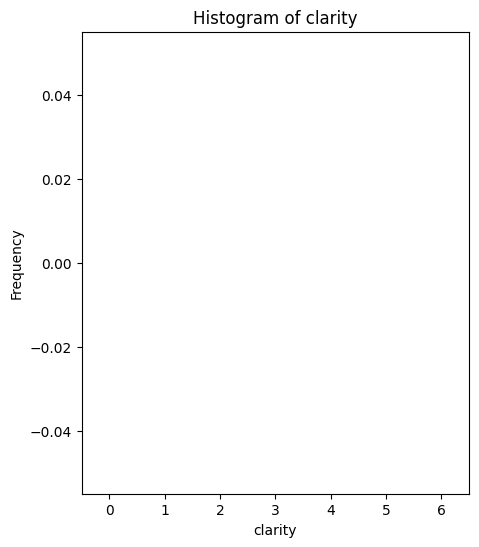

In [158]:
# categorical data -- bar or count is better
for column in category_data.columns:
    plt.figure(figsize=(5, 6))
    sns.countplot(x=category_data[column], palette='Set2')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [159]:
df

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...,...
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


In [160]:
category_data['cut'].value_counts()

Series([], Name: count, dtype: int64)

10.Encode the categorical since its ordinal so we r going with ordinalencoder

In [161]:
category_data['cut'].unique()

array([nan])

In [162]:
category_data['color'].unique()

array([nan])

In [163]:
category_data['clarity'].unique()

array([nan])

In [ ]:
#to ensure these are treated as category type
df[['cut', 'color', 'clarity']] = df[['cut', 'color', 'clarity']].astype('category')


In [165]:
#assigning the values - ordinal encoding (firstmethod)
cut_map={
    'Fair':1, 'Good':2,  'Very Good':3, 'Premium':4, 'Ideal':5, #based on the count plot ideal has highest range
}
cut_map

color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7} # its based on the ranking
color_map

clarity_map = {
    "I1":1, "SI2":2, "SI1":3, "VS2":4, "VS1":5, "VVS2":6, "VVS1":7, "IF":8 #based on the image ranging from worst to best
}

In [166]:
df["cut"] = df["cut"].map(cut_map)
df["color"] = df["color"].map(color_map)
df["clarity"] = df["clarity"].map(clarity_map)


In [168]:
df.drop('id', inplace=True, axis=1)

In [169]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,5,1,6,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,4,4,6,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,3,3,3,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,3,1,3,62.9,55.0,4.45,4.49,2.81,681
